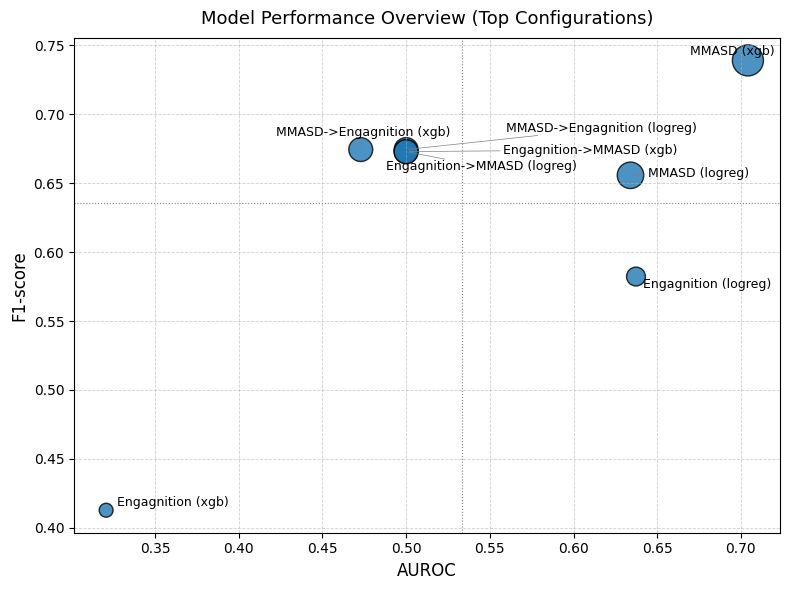

In [8]:
# === Clean AUROC vs F1 scatter plot (publication-ready) ===
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from adjustText import adjust_text  # pip install adjustText

# Load your metrics file
df = pd.read_csv("metrics_all.csv")

# Combine test_* and cv_* columns
def choose(a, b): return np.where(~pd.isna(a), a, b)
df["AUROC"] = choose(df.get("test_auroc"), df.get("cv_auroc"))
df["F1"] = choose(df.get("test_f1_pos"), df.get("cv_f1_pos"))
df["BalancedAccuracy"] = choose(df.get("test_bacc"), df.get("cv_bacc"))

# Filter valid rows
df = df.dropna(subset=["AUROC", "F1"])

# Label for each point
df["Label"] = df["dataset"] + " (" + df["model"] + ")"

# Sort by F1 (optional: top configurations)
df = df.sort_values("F1", ascending=False)

# --- Create figure ---
plt.figure(figsize=(8, 6))
ax = plt.gca()

# Marker sizes depend on Balanced Accuracy if available
sizes = 100
if "BalancedAccuracy" in df.columns and df["BalancedAccuracy"].notna().any():
    sizes = 100 + 400 * (df["BalancedAccuracy"] - df["BalancedAccuracy"].min()) / (
        df["BalancedAccuracy"].max() - df["BalancedAccuracy"].min() + 1e-9
    )

# Scatter plot
sc = ax.scatter(df["AUROC"], df["F1"], s=sizes, color="#1f77b4", alpha=0.8, edgecolor="k")

# Add text labels and auto-adjust to avoid overlap
texts = []
for _, row in df.iterrows():
    texts.append(ax.text(row["AUROC"], row["F1"], row["Label"], fontsize=9, weight="medium"))
adjust_text(texts, arrowprops=dict(arrowstyle="->", color="gray", lw=0.5))

# Axes, titles, and grid
ax.set_xlabel("AUROC", fontsize=12)
ax.set_ylabel("F1-score", fontsize=12)
ax.set_title("Model Performance Overview (Top Configurations)", fontsize=13, pad=10)
ax.grid(True, linestyle="--", linewidth=0.6, alpha=0.6)

# Optional reference lines for orientation
ax.axhline(df["F1"].mean(), color="gray", linestyle=":", lw=0.8)
ax.axvline(df["AUROC"].mean(), color="gray", linestyle=":", lw=0.8)

# Clean layout and save
plt.tight_layout()
plt.savefig("01_leaderboard_scatter_clean.png", dpi=300, bbox_inches="tight")
plt.show()
